In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import ipywidgets as widgets
import math
from random import randint
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from numpy import ma
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_decomposition import CCA

Experimenting with different dimention reduction techniques using the [iris dataset(https://www.kaggle.com/arshid/iris-flower-dataset)

In [6]:
#Load the data
iris_fp = r"IRIS.csv"
iris = pd.read_csv(iris_fp)
#PCA is unsupervised so we are removing the labels
iris_data = iris[['sepal_length','sepal_width','petal_length','petal_width']]
iris_label = iris['species']
iris_data.head()
iris_label.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [7]:
#From https://stackoverflow.com/questions/9740806/pylab-map-labels-to-colors to convert labels to colors in scatter plot
class TextNorm(Normalize):
    '''Map a list of text values to the float range 0-1'''

    def __init__(self, textvals, clip=False):
        self.clip = clip
        # if you want, clean text here, for duplicate, sorting, etc
        ltextvals = set(textvals)
        self.N = len(ltextvals)
        self.textmap = dict(
            [(text, float(i)/(self.N-1)) for i, text in enumerate(ltextvals)])
        self.vmin = 0
        self.vmax = 1

    def __call__(self, x, clip=None):
        #Normally this would have a lot more to do with masking
        ret = ma.asarray([self.textmap.get(xkey, -1) for xkey in x])
        return ret

    def inverse(self, value):
        return ValueError("TextNorm is not invertible")
norm = TextNorm(iris_label)

## PCA

In [8]:
pca = PCA(n_components=2)
pca.fit(iris_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557]


In [10]:
print(pca.singular_values_)

[25.08986398  6.00785254]


In [11]:
pca.get_covariance()

array([[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
       [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
       [ 1.27066452, -0.31863564,  3.11934547,  1.28541527],
       [ 0.5321852 , -0.13363564,  1.28541527,  0.58961806]])

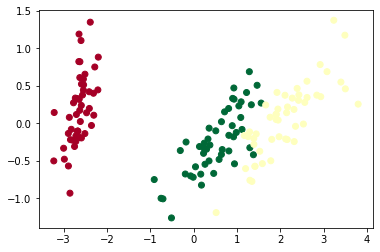

In [12]:
iris_reduced = pca.fit_transform(iris_data)
fig, ax = plt.subplots()
ax.scatter(iris_reduced[:,0], iris_reduced[:,1], c=norm(iris_label), cmap='RdYlGn')

# LDA

In [13]:
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(iris_data,iris_label)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

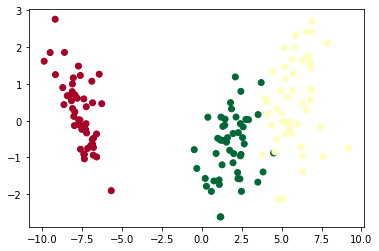

In [14]:
iris_lda = clf.fit_transform(iris_data, iris_label)
fig, ax = plt.subplots()
ax.scatter(iris_lda[:,0], iris_lda[:,1], c=norm(iris_label), cmap='RdYlGn')

# MDS

In [15]:
mds = MDS(n_components=2)
mds.fit(iris_data)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

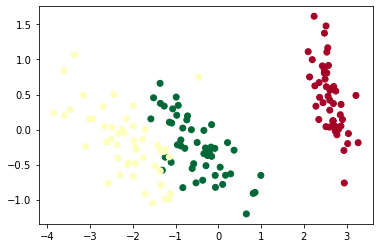

In [16]:
iris_mds = mds.fit_transform(iris_data, iris_label)
fig, ax = plt.subplots()
ax.scatter(iris_mds[:,0], iris_mds[:,1], c=norm(iris_label), cmap='RdYlGn')

# Factor Analysis

In [17]:
fa = FactorAnalysis(n_components=2)
fa.fit(iris_data)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=2,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

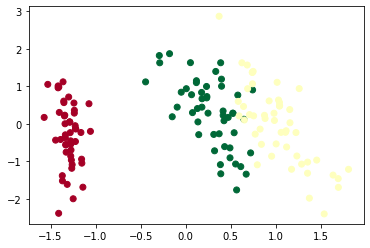

In [18]:
iris_fa = fa.fit_transform(iris_data)
fig, ax = plt.subplots()
ax.scatter(iris_fa[:,0], iris_fa[:,1], c=norm(iris_label), cmap='RdYlGn')

In [19]:
fa.get_covariance()

array([[ 0.68128656, -0.03974309,  1.2650874 ,  0.51597728],
       [-0.03974309,  0.18669567, -0.31871903, -0.13986906],
       [ 1.2650874 , -0.31871903,  3.09244635,  1.28745846],
       [ 0.51597728, -0.13986906,  1.28745846,  0.57853249]])

In [20]:
fa.get_params()

{'copy': True,
 'iterated_power': 3,
 'max_iter': 1000,
 'n_components': 2,
 'noise_variance_init': None,
 'random_state': 0,
 'svd_method': 'randomized',
 'tol': 0.01}

In [21]:
fa.get_precision()

array([[  9.14453527,  -5.32213064,  -4.87398131,   1.40402593],
       [ -5.32213064,   9.64903582,   3.05152781,   0.28863511],
       [ -4.87398131,   3.05152781,   7.00328558, -10.50029417],
       [  1.40402593,   0.28863511, -10.50029417,  23.91329529]])

# ISOMAP

In [22]:
iso = Isomap(n_components=2)
iso.fit(iris_data)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=None,
       n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

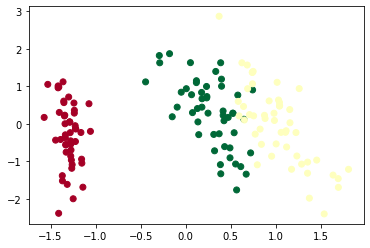

In [23]:
iris_fa = fa.fit_transform(iris_data)
fig, ax = plt.subplots()
ax.scatter(iris_fa[:,0], iris_fa[:,1], c=norm(iris_label), cmap='RdYlGn')

# Locally Linear Embedding

In [63]:
lle = LocallyLinearEmbedding(n_components=2, method='modified') # Non-modified give bad results method='modified'
lle.fit(iris_data)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
                       method='modified', modified_tol=1e-12, n_components=2,
                       n_jobs=None, n_neighbors=5, neighbors_algorithm='auto',
                       random_state=None, reg=0.001, tol=1e-06)

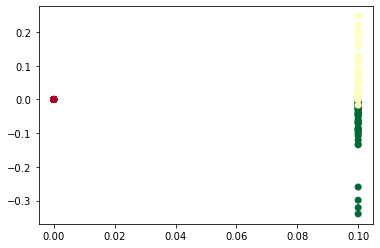

In [64]:
iris_lle = lle.fit_transform(iris_data)
fig, ax = plt.subplots()
ax.scatter(iris_lle[:,0], iris_lle[:,1], c=norm(iris_label), cmap='RdYlGn')